# Tarea Semana 15
## Algoritmo Genético Estándar (AGM)

### Realizado por: Jose Javier Fernández y Kaled Sequeira Aguilar

- Realice las actividades que se le indican en los espacios disponibles. 
- Debe entregar una copia de este cuaderno en el espacio habilitado el tecDigital para el trabajo en clase TS15.
- Puede agregar celdas de texto o código si lo considera necesario.
- Use nombres descriptivos para las variables y las funciones que defina. 
- Agregue todos los comentarios que considere necesarios para mejorar la comprensión del código.
- **Valor total 22 puntos**.
- Fecha de entrega: **Viernes 02 de junio, 11.59 pm**.



Use la implementación del algoritmo genético estándar para encontrar el máximo de la función:
    
$$
\psi_1(x_1, x_2) = \dfrac{e^{-x_1^2-x_2^2} + \sqrt{5}\sin^2{(x_1^2x_2)} + 2\cos^2{(2x_1 + 3x_2)}}{1 + x_1^2 + x_2^2}
$$
En el rango $x_1, x_2 \in [-3, 3]$

Así como el mínimo global de la función

$$
\psi_2(x_1,x_2) = 100(x_1^2 - x_2)^2 + (1 - x_1)^2
$$

En el rango $x_1, x_2 \in [-5.12, 5.12]$

In [1]:
# Librerias necesarias
import numpy as np
import matplotlib.pyplot as plt

### Inicialización

1. Inicialice la población. Genere $N$ secuencias binarias aleatorias (cromosomas) $c_i$. **Valor: 2 puntos.**

In [2]:
# Inicialización

# Toma el tamaño y el número de genes creando un array con esas dimensiones
def generar(N,ngenes):
    matriz = []
    for i in range(0,N):
        matriz.append([])
        for j in range(0,ngenes):
            matriz[i].append(np.random.randint(0,2))
    return matriz

### Evaluación

2. Escriba una función de decodificación que obtenga las variables $x_{j}$ a partir de los cromosomas $c_i$. Suponga que debe obtener _2_ variables, donde cada variable se obtiene a partir de la mitad de los genes del cromosoma. **Valor: 2 puntos.**

In [3]:
# Decodificación del cromosoma
def decod(cromosoma, d):
    producto = 0
    i = 1
    for g in cromosoma:
        producto += g*2**-i
        i+=1
    k=len(cromosoma)
    
    x = -d + (2*d/(1-2**-k)) * producto

    return x

In [4]:
# Se debe obtener 2 variables, donde cada variable se obtiene a partir de la mitad de los genes del cromosoma
def generar_variables(genoma,d):
    variables=[]
    mitadCrom = len(genoma[0])//2


    for cromosoma in genoma:
        x1 = decod(cromosoma[:mitadCrom],d)
        x2 = decod(cromosoma[mitadCrom:],d)
        variables.append([x1,x2])

    variables = np.asarray(variables)
    return variables


3. Evalúe la función ajuste usando las variables obtenidas en el paso anterior, y asigne un valor de ajuste $ajuste_i = f(\mathbf{x}_i)$ a cada cromosoma. **Valor: 1 punto.**

In [5]:
# Evaluación
# Primero se definen las funciones
def phi_1(x1,x2):
    termino1 = np.exp( -x1**2 -x2**2) 
    termino2 = np.sqrt(5) * np.sin(x1**2 * x2)**2
    termino3 = 2*np.cos(2*x1 + 3*x2)**2

    return ( termino1  +   termino2   +  termino3   )/(1 + x1**2 + x2**2)


def phi_2(x1,x2):
    return 100 * (x1**2 - x2)**2 +(1-x1)**2

4. Defina una variable $i_{óptimo}$ que almacene el índice (dentro de la población) del mejor cromosoma (el que tenga el mejor valor de ajuste). Guarde también el mejor valor de ajuste en la variable .
5. Itere sobre todos los cromosomas y si $F_i > F_{óptimo}$ actualice los valores de $i_{óptimo}$ y $F_{óptimo}$. **Valor: 1 punto.**

In [6]:
# Valores óptimos

## Para phi 1
def optimo(ajuste):
    return np.argmax(ajuste), np.max(ajuste)

def optimo_min(ajuste):
    return np.argmin(ajuste), np.min(ajuste)

# Para phi2 se usa 1/F


### Formación de la nueva generación

6. Aplique el operador de _elitismo_ para formar la nueva generación. Esto es, copie el cromosoma mejor evaluado. **Valor: 1 punto.**
7. Utilice el proceso de selección por torneo para seleccionar 2 individuos de la población. **Valor: 1 punto.**
8. Genere dos nuevos cromosomas cruzando, con probabilidad $p_{cruce}$ los cromosomas seleccionados en el paso anterior. Con probabilidad $1 - p_{cruce}$ returne los cromosomas viejos sin cambios. **Valor: 1 punto.**
9. Aplique el operador mutación sobre los cromosomas generados. El operador mutación recorre **todos** los genes del cromosoma y los muta con probabilidad $p_{mut}$. **Valor: 1 punto.**
10. Repita los pasos 7 a 9 hasta generar una nueva población.

In [7]:
# Torneo de selección
def seleccion(ajuste, pTorneo):
    prob = np.random.uniform(0,1)
    i=0

    if pTorneo >= prob:
        i = np.argmax(ajuste)
    elif pTorneo < prob:
        i = np.argmin(ajuste)
    
    return i

# Operador de cruce
def cruce(crom1, crom2, pCruce):
    prob = np.random.uniform(0,1)

    if pCruce >= prob:
        i = np.random.randint(1,len(crom1)-1)
        newcrom1 = crom1[:i] + crom2[i:]
        newcrom2 = crom2[:i] + crom1[i:]
    else:
        newcrom1,newcrom2 = crom1,crom2

    return newcrom1,newcrom2

# Mutación
def muta(crom, pMut):
    prob = np.random.uniform(0,1)

    if pMut >= prob:
        i = np.random.randint(0,len(crom))
        if crom[i]:
            crom[i]=0
        else:
            crom[i]=1

    return crom 


# Nueva población: 

def nueva_gen(indiceOptimo, genoma, ajuste, pTorneo, pCruce, pMut):
    N=len(genoma)
    nuevoGenoma = []
    elite = genoma[indiceOptimo[0]]

    #Loop de nueva población

    while True:
        #Torneo
        indiceCrom1 = seleccion(ajuste, pTorneo) # Realiza el torneo y guarda el índice
        indiceCrom2 = seleccion(ajuste, pTorneo)

        #Cruce
        crom1,crom2 = cruce(genoma[indiceCrom1] , genoma[indiceCrom2] , pCruce)

        ajuste = np.delete(ajuste, indiceCrom1) # Elimina el valor del índice del ajuste
        ajuste = np.delete(ajuste, indiceCrom2-1) 
        genoma.pop(indiceCrom1) # Elimina el valor del índice del genoma
        genoma.pop(indiceCrom2-1)


        nuevoGenoma.append(crom1)
        nuevoGenoma.append(crom2)


        if len(nuevoGenoma)>=N:
            nuevoGenoma = nuevoGenoma[:29]
            break
        

    for indiceCrom,crom in enumerate(nuevoGenoma):
        nuevoGenoma[indiceCrom] = muta(crom, pMut)
        
    nuevoGenoma.append(elite)
    

    return nuevoGenoma
    
    


11. Regrese al paso 2 y repita el proceso hasta que alcance un criterio de terminación. Establezca un criterio de terminación. El resultado de este ciclo son los valores óptimos de la función de ajuste. **Valor: 4 puntos.**

In [8]:
# Ciclo principal

def main(genoma, numEcuacion, pCruce, pMut, pTorneo, numGeneraciones = 1500):
    valoresOptimos = []


    for k in range(numGeneraciones):

        if numEcuacion==1:
            d = 3
            variables = generar_variables(genoma,d)
            
            ajuste = phi_1(variables[:,0],variables[:,1])
            indiceOptimo = optimo(ajuste)
            
            x1Optima = variables[indiceOptimo[0]][0]
            x2Optima = variables[indiceOptimo[0]][1]
                    
        elif numEcuacion==2:
            d=5.12
            variables = generar_variables(genoma,d)
            ajuste = phi_2(variables[:,0],variables[:,1])

            nuevoIndiceOptimo = optimo_min(ajuste)
            
            if k == 0 or nuevoIndiceOptimo[1] <= indiceOptimo[1]:
                indiceOptimo = nuevoIndiceOptimo
                
                x1Optima = variables[indiceOptimo[0]][0]
                x2Optima = variables[indiceOptimo[0]][1]

        valoresOptimos.append([x1Optima , x2Optima, indiceOptimo[1]])
        genoma = nueva_gen(indiceOptimo, genoma, ajuste, pTorneo, pCruce, pMut)
        
    
    return np.asarray(valoresOptimos)
    
    

12. Los pasos anteriores forman la implementación de AGM. Utilice el AGM para encontrar los valores óptimos de $\psi_1$ y $\psi_2$ en los rangos indicados. Utilice el siguiente conjunto de parámetros iniciales para ejecutar su AGM. 
13. Puede cambiar los parámetros iniciales si considera que puede mejorar el rendimiento AGM. Justifique su razonamiento en caso de que seleccione un nuevo conjunto de parámetros. **Valor: 2 puntos.**

In [9]:
# Parámetros iniciales
tamañoPoblación = 30
nGenes = 40
p_cruce = 0.4
p_mut = 0.025
p_torneo = 0.75

### Resultados

14. Para cada ejecución del AGM (para cada función de ajuste) genere un gráfico que muestre la evolución por cada generación de los valores de ajuste máximo y promedio de la población. Esto implica que debe guardar los valores de ajuste para cada generación del proceso de optimización. **Valor: 4 puntos.**

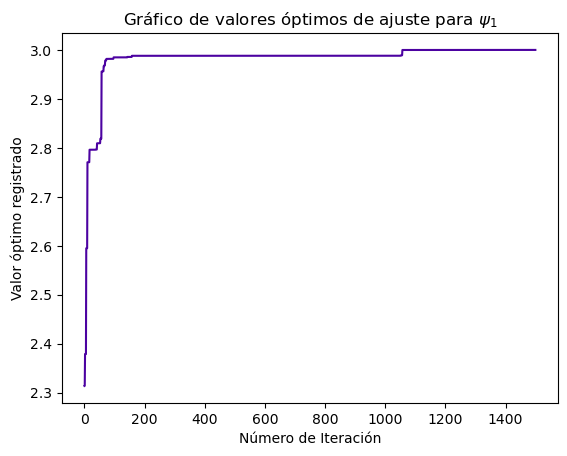

In [10]:
# Gráfico de evolución de los valores de ajuste
genoma1 = generar(tamañoPoblación, nGenes)
resultadoPhi1 = main(genoma1, 1, p_cruce, p_mut, p_torneo)
y1 = resultadoPhi1[:,2]


plt.plot(np.arange(len(y1)),y1, c="#4c02a1")
plt.title("Gráfico de valores óptimos de ajuste para $\psi_1$")
plt.xlabel("Número de Iteración")
plt.ylabel("Valor óptimo registrado")
plt.show()

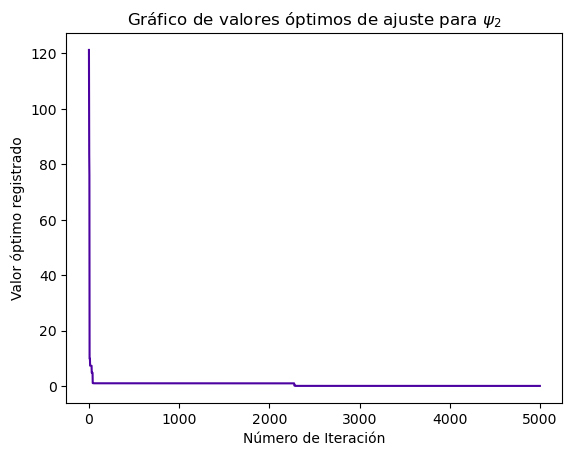

In [16]:
# Gráfico de evolución de los valores de ajuste
genoma2 = generar(tamañoPoblación, nGenes)

## Se modifican las probabilidades para ayudar al algoritmo
p_mut = 0.4 
p_cruce = 0.7
p_torneo = 0.75

resultadoPhi2 = main(genoma2, 2, p_cruce, p_mut, p_torneo, 5*10**3)
y2 = resultadoPhi2[:,2]


plt.plot(np.arange(len(y2)),y2, c="#4c02a1")
plt.title("Gráfico de valores óptimos de ajuste para $\psi_2$")
plt.xlabel("Número de Iteración")
plt.ylabel("Valor óptimo registrado")
plt.show()

15. Grafique las funciones de ajuste y sobre ellas los valores óptimos obtenidos a partir del AGM. **Valor: 2 puntos.**

In [17]:
# Valores óptimos
print(f"Valor óptimo de $\psi _1$ {y1[-1]}")
print(f"Valor óptimo de $\psi _2$ {y2[-1]}")

Valor óptimo de $\psi _1$ 2.999999987083332
Valor óptimo de $\psi _2$ 0.0732157215183743


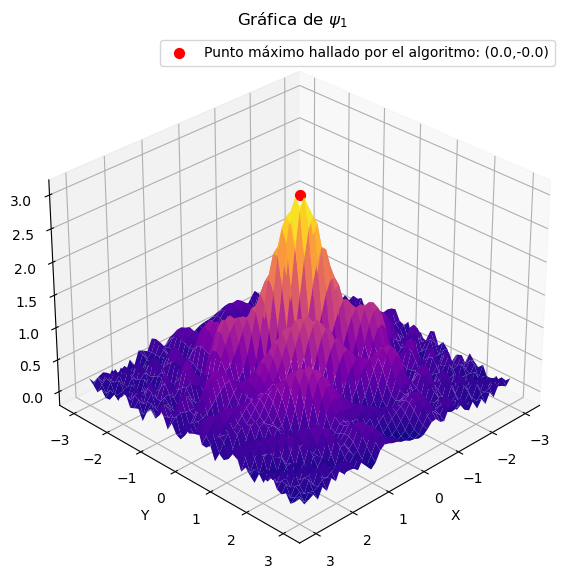

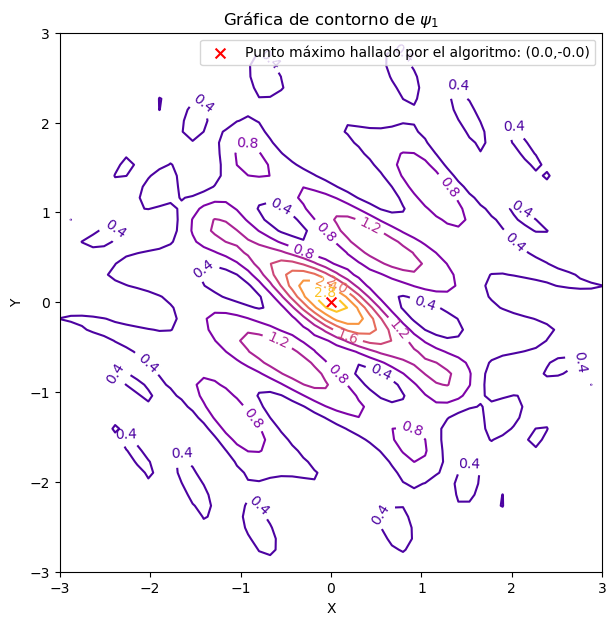

In [18]:
longitud = np.linspace(-3,3)

X, Y = np.meshgrid(longitud,longitud)

labelPuntoMax = str("Punto máximo hallado por el algoritmo: ("+ str(np.round(resultadoPhi1[-1,0],3)) +","+ str(np.round(resultadoPhi1[-1,1],3)) +")")

fig, ax = plt.subplots(figsize=(7,7),subplot_kw={"projection": "3d"})
ax.view_init(30,45)
ax.plot_surface(X,Y,phi_1(X,Y), cmap="plasma")   
ax.scatter(resultadoPhi1[-1,0],resultadoPhi1[-1,1],resultadoPhi1[-1,2], color="red", s=50, label=labelPuntoMax)
ax.set(
    xlabel="X",
    ylabel="Y",
    title="Gráfica de $\psi_1$"
)
ax.legend(loc="best")
plt.show()




fig, ax = plt.subplots(figsize=(7,7))
CS = ax.contour(X,Y,phi_1(X,Y), cmap="plasma") 
ax.clabel(CS, inline=True, fontsize=10)
ax.scatter(resultadoPhi1[-1,0],resultadoPhi1[-1,1], marker="x", color="red", s=50,  label=labelPuntoMax)
ax.set(
    xlabel="X",
    ylabel="Y",
    title="Gráfica de contorno de $\psi_1$"
    )
ax.legend(loc="best")
    
plt.show()


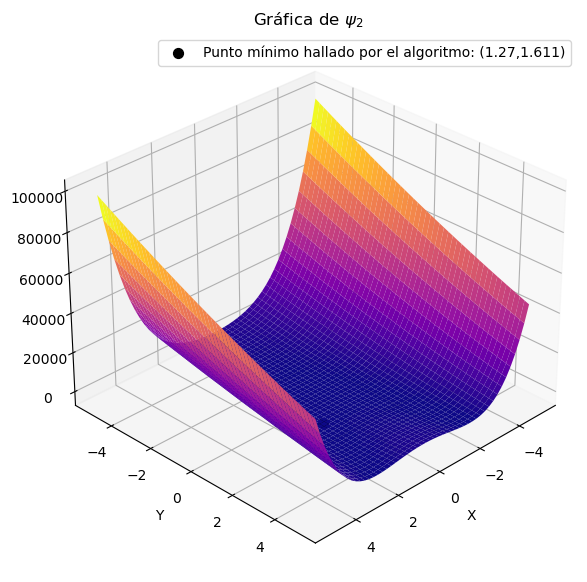

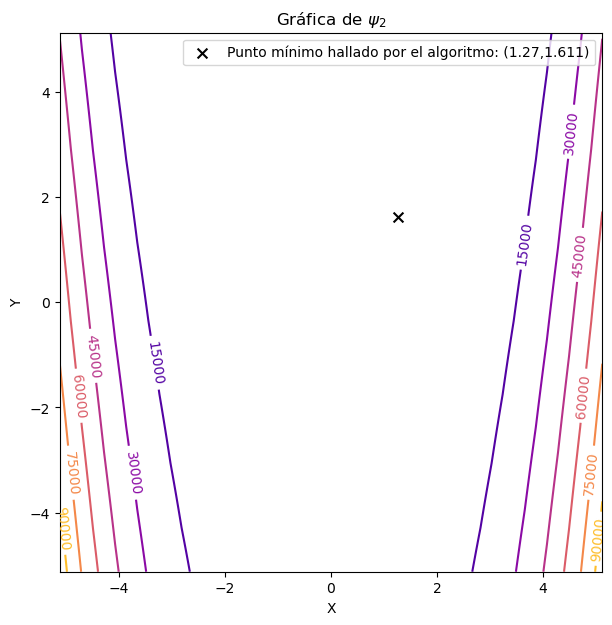

In [19]:
longitud = np.linspace(-5.12,5.12)

X, Y = np.meshgrid(longitud,longitud)

labelPuntoMin = str("Punto mínimo hallado por el algoritmo: ("+ str(np.round(resultadoPhi2[-1,0],3)) +","+ str(np.round(resultadoPhi2[-1,1],3)) +")")


fig, ax = plt.subplots(figsize=(7,7),subplot_kw={"projection": "3d"})
ax.view_init(30,45)
ax.plot_surface(X,Y,phi_2(X,Y), cmap="plasma")   
ax.scatter(resultadoPhi2[-1,0],resultadoPhi2[-1,1],resultadoPhi2[-1,2], color="black", s=50, label=labelPuntoMin)
ax.set(
    xlabel="X",
    ylabel="Y",
    title="Gráfica de $\psi_2$"
)
ax.legend(loc="best")
plt.show()



fig, ax = plt.subplots(figsize=(7,7))
CS = ax.contour(X,Y,phi_2(X,Y), cmap="plasma") 
ax.clabel(CS, inline=True, fontsize=10)
ax.scatter(resultadoPhi2[-1,0],resultadoPhi2[-1,1],marker="x", color="black", s=50, label=labelPuntoMin)
ax.set(
    xlabel="X",
    ylabel="Y",
    title="Gráfica de $\psi_2$"
)
ax.legend(loc="best")
plt.show()

## Referencias
* M.Wahde (2008). _Biologically Inspired Optimization Methods: An Introduction_. WIT Press.
* Pang, T. (2006). _An Introduction to Computational Physics_. Cambridge: Cambridge University Press.
* M. Mitchell. (1996). _An Introduction to Genetic Algorithms_. MIT Press, Cambridge, USA. 